<a href="https://colab.research.google.com/github/Eben2020-hp/Digit-Recognition/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align= 'center'> Handwritten Digit Recognition </h1>
<h3 align= 'center'>Using Convolutional Neural Networks in Python with Keras</h3>

### INTRODUCTION

The MNIST handwritten digit classification problem is a standard dataset used in computer vision and deep learning.

Although the dataset is effectively solved, it can be used as the basis for learning and practicing how to develop, evaluate, and use convolutional deep learning neural networks for image classification from scratch. This includes how to develop a robust test harness for estimating the performance of the model, how to explore improvements to the model, and how to save the model and later load it to make predictions on new data.

The "hello world" of object recognition for machine learning and deep learning is the MNIST dataset for handwritten digit recognition.

In [1]:
## Loading the Dataset
from keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt

11501568/11490434 [==============================] - 0s 0us/step


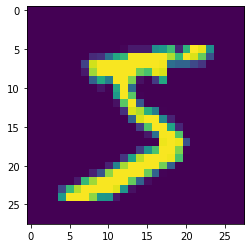

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## Viewing the Original Image
plt.imshow(X_train[0])
plt.show()

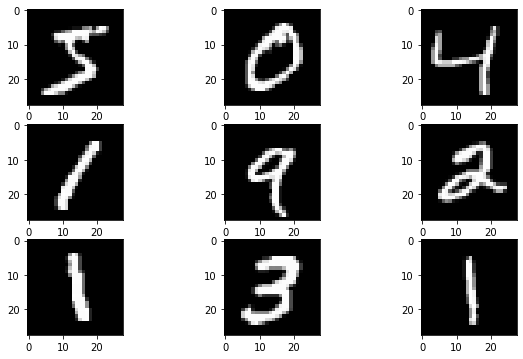

In [3]:
plt.figure(figsize= (10, 6))
## Viewing the first 9 images
for i in range(9):
    plt.subplot(331+i)        ## defining the subplot.
    plt.imshow(X_train[i], cmap= plt.get_cmap('gray'))

plt.show()

In [4]:
# Summarize dataset
print(f'Train: X={X_train.shape}, y={y_train.shape}')
print()
print(f'Test: X={X_test.shape}, y={y_test.shape}')

Train: X=(60000, 28, 28), y=(60000,)

Test: X=(10000, 28, 28), y=(10000,)


- Here we can see that there are 60000 training images and 10000 test images. These images are square with 28x28 pixels.

##### MNIST dataset can be a useful starting point for developing and practicing a methodology for solving image classification tasks using convolutional neural networks.



In [5]:
## Checking the values of each pixels (0 -> Black; 255 -> White; 1-254 -> Gray)
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

- Here we can see that the back-ground is black in color and the position where the number is either gray or white.

#### Normalize the Pixels

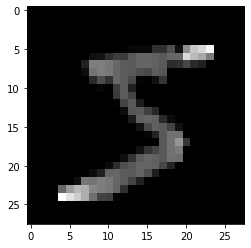

In [6]:
## We can see that the values range from 0 to 255. Thus we NORMALIZE it.
### We can also do X_train/255, but since we have an inbuilt function it is fine.

X_train = tf.keras.utils.normalize(X_train, axis= 1)    ## In this case since size is 28x28, axis need not be mentioned.
X_test = tf.keras.utils.normalize(X_test, axis= 1)
plt.imshow(X_train[0], cmap= 'gray')

In [7]:
## Checking the values of each pixels
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

- Now we can see that all of the values are between 0 and 1. We perform Normalization because if the color changes also we need not care about it.

The first Output Value of the training data is: 5



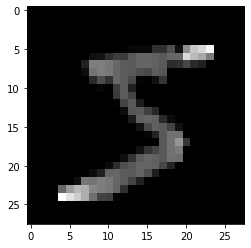

In [8]:
## Checking if the Image matches the Label.

print(f'The first Output Value of the training data is: {y_train[0]}')
print()
plt.imshow(X_train[0], cmap= 'gray')  ## We know that this is 5.

- Here we can see that both the image and the output label are the same.

#### Resize the Image

In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
import numpy as np
IMG_SIZE = 28

## Here we will increase 1 dimension for kernel/filter operation. It is 1 because we have to perform Convolution Operation.
X_train_resize = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)  
X_test_resize = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1) 

X_train_resize.shape

(60000, 28, 28, 1)

#### Create Deep Learning Architecture

In [11]:
from keras.models import Sequential     ##A deep learning model.
from keras.layers import Dense, MaxPooling2D, Conv2D, Activation, Flatten, Dropout     ## Different Layers

In [12]:
# Create the Neural Network
model = Sequential()

## First Convolution Layer -> 28-3+1 = 26x26
model.add(Conv2D(64, (3,3), input_shape= X_train_resize.shape[1:]))    ## Only for this layer we need to specify the Input Shape.
### input_shape = (28, 28, 1)
model.add(Activation('relu'))     ## Acivation Function -> to make it non-linear
model.add(MaxPooling2D(pool_size= (2, 2)))      ## MaxPooling Layer -> It will take only a single maximum value of the 2x2 matrix (removes the rest).
                                                ## MaxPooling Layer --> reduces the size to half.

## Second Convolution Layer -> 13-3+1 = 11x11
model.add(Conv2D(64, (3,3))) 
model.add(Activation('relu'))   
model.add(MaxPooling2D(pool_size= (2, 2)))


## Third Convolution Layer -> 5-3+1 = 3x3
model.add(Conv2D(64, (3,3))) 
model.add(Activation('relu'))   
model.add(MaxPooling2D(pool_size= (2, 2)))


## Fully Conected layer #1
model.add(Flatten())    ## Before the fully connected layer, we need to Flatten it --> 2D to 1D 
model.add(Dense(64))    ## Neural Network layer --> 64 neurons
model.add(Activation('relu'))

## Fully Conected layer #2
model.add(Dense(32))    ## Neural Network layer --> 32 neurons
model.add(Activation('relu'))

## Last Fully Conected layer 
model.add(Dense(10))    ## This last layer must be 10 which is equal to the number of classes (0-9)
model.add(Activation('softmax'))    ##  This activation but be either "sigmoid" (binary) or "softmax" (class probabilities)

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          3

- From the above model summary we can see how each layer works.

In [14]:
print(f"Total training Sample: {X_train_resize.shape[0]}")

Total training Sample: 60000


In [15]:
## Compile the model
model.compile(loss= 'sparse_categorical_crossentropy', optimizer= 'adam', metrics= ['accuracy'])

In [16]:
## Training Procedure
model.fit(X_train_resize, y_train, epochs= 5, batch_size= 32, validation_split= 0.3)

Epoch 1/5
1313/1313 [==============================] - 76s 46ms/step - loss: 0.6957 - accuracy: 0.7774 - val_loss: 0.1406 - val_accuracy: 0.9572
Epoch 2/5
1313/1313 [==============================] - 60s 46ms/step - loss: 0.1149 - accuracy: 0.9643 - val_loss: 0.1003 - val_accuracy: 0.9698
Epoch 3/5
1313/1313 [==============================] - 60s 46ms/step - loss: 0.0765 - accuracy: 0.9758 - val_loss: 0.0774 - val_accuracy: 0.9765
Epoch 4/5
1313/1313 [==============================] - 60s 46ms/step - loss: 0.0553 - accuracy: 0.9824 - val_loss: 0.0750 - val_accuracy: 0.9779
Epoch 5/5
1313/1313 [==============================] - 60s 46ms/step - loss: 0.0447 - accuracy: 0.9859 - val_loss: 0.0748 - val_accuracy: 0.9781


- The model is being trained on 70% data and the remaining 30% of the model is being validated.

- When we view the metrics above we can see that the accuracy of the training and validation model is close to each other. This is a very good indication that out model is working well (**An Ideal Situation**).
 ___
 - Validation Accuracy ~= Training Accuracy --> Doing Well
 - Validation Accuracy (30) < Training Accuracy (90) --> Over Fitting
 ___

In [17]:
## Evaluating on Test Data
test_loss, test_accuracy = model.evaluate(X_test_resize, y_test)
print(f'Loss obtained on 10,000 test samples is: {test_loss}')
print(f'Accuracy obtained on 10,000 test samples is: {test_accuracy}')

313/313 [==============================] - 3s 11ms/step - loss: 0.0737 - accuracy: 0.9785
Loss obtained on 10,000 test samples is: 0.07374236732721329
Accuracy obtained on 10,000 test samples is: 0.9785000085830688


#### Predictions

In [18]:
prediction = model.predict(X_test_resize)
prediction

array([[2.92870354e-05, 6.41932002e-06, 1.12135247e-04, ...,
        9.99784768e-01, 1.11512804e-07, 4.43704812e-06],
       [4.80346500e-07, 3.22306590e-08, 9.99999404e-01, ...,
        1.65661207e-09, 2.17667981e-08, 5.01369501e-10],
       [9.49340915e-07, 9.99996781e-01, 7.11490941e-07, ...,
        5.91929961e-07, 3.63840797e-08, 9.59922453e-09],
       ...,
       [7.88466981e-09, 2.58423512e-07, 3.68269468e-08, ...,
        5.26225563e-07, 4.18892476e-08, 3.21125668e-07],
       [1.49906278e-04, 6.30873501e-07, 2.40079453e-06, ...,
        1.79725561e-07, 3.35498880e-05, 6.38881975e-05],
       [5.12445532e-03, 9.21285732e-07, 5.14580461e-05, ...,
        1.06747455e-08, 2.60220459e-05, 2.02007595e-06]], dtype=float32)

- Since we applied ***softmax** Activation function we have got the class probabilities. Now, in this case we need to find the maximum probability of the class.

- To find Maximum Probability of the Class --> np.argmax(class)
  - np.argmax -> returns the element of the set that maximizes the function

In [19]:
# Converting predictions from one-hot encoding
np.argmax(prediction[0])

7

The first predicted Output Value of the test data is: 7



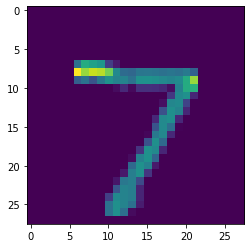

In [20]:
## Checking if the prediction matches the Image.

print(f'The first predicted Output Value of the test data is: {np.argmax(prediction[0])}')
print()
plt.imshow(X_test[0])

The Generated Random Number is: 9089

The first predicted Output Value of the test data is: 9



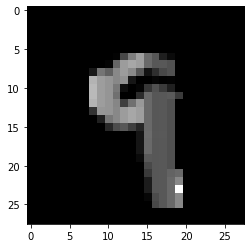

In [21]:
## Checking if the prediction matches the Image. (Random Image)

Random_number = np.random.randint(0, 10000)
print(f'The Generated Random Number is: {Random_number}')
print()
print(f'The first predicted Output Value of the test data is: {np.argmax(prediction[Random_number])}')
print()
plt.imshow(X_test[Random_number], cmap='gray')

### Final Submission

In [22]:
prediction.shape

(10000, 10)

In [23]:
labels = np.argmax(prediction, axis=1)
labels.shape

(10000,)

In [30]:
import pandas as pd

data = {"Label" : labels}
df = pd.DataFrame(data=data)

## Adding index values
df['ImageId'] = df.index.values + 1

## Procedure to make "ImageId" first column
first_column = df.pop('ImageId')
df.insert(0, 'ImageId', first_column)

df.head()

,ImageId,Label
0,1,7
1,2,2
2,3,1
3,4,0
4,5,4


In [32]:
df.to_csv('submission.csv', index=False)
print('Submission csv is ready')

Submission csv is ready
